## Alzheimer's Disease Data Analysis
Alzheimer's disease is a neurodegenerative disorder that destroys a person's memory and other functions over time. In this project, we will explore the relationship between Alzheimer's and educational level, biological sex, and genotype in Python.

This dataset contains data of donors of brain tissue. The study the dataset was obtained from (https://aging.brain-map.org/overview/home) focuses on the relationship between traumatic brain injuries (TBIs) and Alzheimer's disease incidence. However, since TBI may be a very strong influence on whether or not a person gets Alzheimer's, we will only study the subjects who have never had a traumatic brain injury. 

In [83]:
import pandas as pd
df = pd.read_csv("DonorInformation.csv")

# Take only the rows with 0 TBIs:
df = df[df["num_tbi_w_loc"] == 0]
df

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
5,309335457,H14.09.020,95-99,F,N,18,0,Unknown or N/A,2,0,No Dementia,1,No Dementia,N,Non-white,Not Hispanic,No Dementia,3,2
7,326765681,H14.09.094,78,M,N,18,0,Unknown or N/A,1,0,No Dementia,46,No Dementia,N,White,Not Hispanic,No Dementia,2,1
9,326765657,H14.09.070,95-99,M,N,16,0,Unknown or N/A,0,0,No Dementia,26,No Dementia,N,White,Not Hispanic,No Dementia,2,1
10,309335443,H14.09.006,90-94,F,N,14,0,Unknown or N/A,0,0,No Dementia,16,No Dementia,N,White,Not Hispanic,No Dementia,3,1
12,326765661,H14.09.074,82,F,N,16,0,Unknown or N/A,1,0,No Dementia,29,No Dementia,N,White,Not Hispanic,No Dementia,3,1
14,326765659,H14.09.072,89,F,N,15,0,Unknown or N/A,1,0,No Dementia,27,No Dementia,N,White,Not Hispanic,No Dementia,4,1
18,309335475,H14.09.038,78,M,N,16,0,Unknown or N/A,0,0,No Dementia,49,No Dementia,N,White,Not Hispanic,No Dementia,2,0
19,309335445,H14.09.008,90-94,M,N,9,0,Unknown or N/A,3,0,Multiple Etiologies,17,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,6,3


The first variable we will examine is education. Intellectually stimulating activities are known to have a strong negative correlation with Alzheimer's disease. We'll split the dataset into bins based on years of education, and then within each bin examine the rate of Alzheimer's disease.

<BarContainer object of 7 artists>

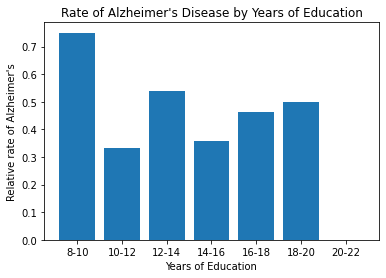

In [84]:
import matplotlib.pyplot as plt

dementia = df[df["act_demented"] == "Dementia"]
no_dementia = df[df["act_demented"] == "No Dementia"]
df["education_years"] = df["education_years"].astype(int)

x = []
y = []
for i in range(8, 22, 2):
    edu_bin = df[(i <= df["education_years"]) & (df["education_years"] < i + 2)]
    p = len(edu_bin[edu_bin["act_demented"] == "Dementia"])/len(edu_bin)
    x.append(f"{i}-{i+2}")
    y.append(p)

plt.title("Rate of Alzheimer's Disease by Years of Education")
plt.ylabel("Relative rate of Alzheimer's")
plt.xlabel("Years of Education")
plt.bar(x, y)

In [85]:
dementia_ey_mean = dementia["education_years"].mean()
no_dementia_ey_mean = no_dementia["education_years"].mean()
print("Education years of people with dementia:", dementia_ey_mean)
print("Education years of people with no dementia:", no_dementia_ey_mean)

Education years of people with dementia: 13.583333333333334
Education years of people with no dementia: 14.7


Overall, it doesn't actually seem like there's a lot of evidence to suggest that years of education plays a strong role in reducing the probability of getting Alzheimer's disease. The bar chart shows, for each bin of "years of education," the probability of getting Alzheimer's. If years of education played a significant role, we'd probably see a downtrend in each of the bars. However, we don't. We also compared years of education in people with and without dementia, finding no significant difference.

## Biological Sex

Next, we will compare the rate of Alzheimer's disease against sex. We'll split the dataset into men and women, and compare the rate of Alzheimer's in each group.

In [86]:
# CI
import math
from scipy.stats import norm

num_men = len(df[df["sex"] == "M"])
num_women = len(df[df["sex"] == "F"])
num_men_dementia = len(dementia[dementia["sex"] == "M"])
num_women_dementia = len(dementia[dementia["sex"] == "F"])

p_pooled = (num_men_dementia + num_women_dementia) / (num_men + num_women)
p_men = num_men_dementia / num_men
p_women = num_women_dementia / num_women

print("Sample proportion of men with dementia: ", p_men)
print("Sample proportion of women with dementia: ", p_women)

Sample proportion of men with dementia:  0.5
Sample proportion of women with dementia:  0.36363636363636365


So there appears to be some kind of difference. Our sample proportion of men with dementia is almost 14% higher than the sample proportion of women with dementia. We suspect that men may suffer from dementia more frequently than women. To test this claim, we will create a lower bound for the "plausible" difference between men and women. We will also perform a hypothesis test and compute the p-value. We will use a significance level $\alpha=0.05$.

$H_{0}: p_{DM}-p_{DW}=0$

$H_{a}: p_{DM}-p_{DW}>0$

In [87]:
# H0 = p_women - p_men = 0
# Ha = p_women - p_men != 0
z_alpha2 = norm.ppf(0.95)
SE_diff = z_alpha2*math.sqrt(p_men*(1-p_men)/num_men + p_women*(1-p_women)/num_women)

diff = p_men - p_women

lower_bound = diff - SE_diff
print(f"95% confidence lower bound for difference in dementia proportion between men and women: {lower_bound}")

95% confidence lower bound for difference in dementia proportion between men and women: -0.08633586075465546


The interval $(-0.086, \infty)$ contains 0, which means it is "plausible" for the difference to be 0. This would typically mean we fail to reject the null hypothesis. However, we will do a hypothesis test just to be sure.

In [88]:
# To do a hypothesis test, first calculate the z-score for our sample
z_score = (p_men - p_women) / math.sqrt(p_pooled*(1-p_pooled)*(1/num_men + 1/num_women))
print("The z-score is", z_score)

# Now compute P(Z > z):
p_value = norm.cdf(-z_score)
print("P(Z > z) =", p_value)

The z-score is 0.9908673886137245
P(Z > z) = 0.16087516911944588


Since the p-value of 0.1609 is greater than our significance level of 0.05, we fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of men suffering from dementia is higher than the proportion of women.

So sex may not be a huge influence in the incidence of Alzheimer's, but we can look at other biological factors as well. One important variable in this dataset is the presence or absence of the ApoE4 genotype, which is often called the "Alzheimer's Gene." We'd like to know if the incidence of Alzheimer's disease in those who have the gene is higher than the incidence in those who don't have the gene. We'll conduct a hypothesis test at the 95% significance level.

$H_0:p_A-p_{NA}=0$

$H_a:p_A-p_{NA}>0$

In [89]:
allele = df[df["apo_e4_allele"] == "Y"]
no_allele = df[df["apo_e4_allele"] == "N"]
allele_dementia = allele[allele["act_demented"] == "Dementia"]
no_allele_dementia = no_allele[no_allele["act_demented"] == "Dementia"]

p_allele = len(allele_dementia)/len(allele)
p_no_allele = len(no_allele_dementia)/len(no_allele)

print("sample proportion of those who DO have the allele and have dementia: ", p_allele)
print("sample proportion of those who DON'T have the allele and have dementia: ", p_no_allele)

sample proportion of those who DO have the allele and have dementia:  0.7272727272727273
sample proportion of those who DON'T have the allele and have dementia:  0.3333333333333333


We'll also make a bar chart to illustrate the difference.

<BarContainer object of 2 artists>

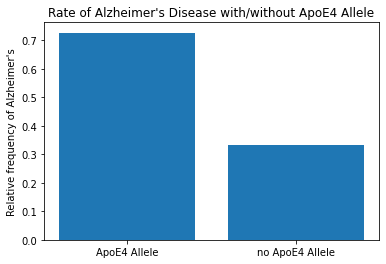

In [90]:
x = ["ApoE4 Allele", "no ApoE4 Allele"]
y = [p_allele, p_no_allele]
plt.title("Rate of Alzheimer's Disease with/without ApoE4 Allele")
plt.ylabel("Relative frequency of Alzheimer's")
plt.bar(x, y)

At first glance, the difference seems significant, much more so than in the examination of gender. We'll continue with the actual test.

In [91]:
p_allele_pooled = (len(allele_dementia) + len(no_allele_dementia))/(len(allele) + len(no_allele))

# Compute the z-score
z_score = (p_allele - p_no_allele) / math.sqrt(p_allele_pooled * (1-p_allele_pooled) * (1/len(allele) + 1/len(no_allele)))
p_value = norm.cdf(-z_score)

print("The z-score is", z_score)
print("P(Z > z) =", p_value)

The z-score is 2.337945668476616
P(Z > z) = 0.00969503339240265


Since the p-value of 0.009695 is less than our significance level of 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that the incidence of Alzheimer's disease in those with the ApoE4 genotype is greater than those without the genotype.